In [1]:
library(VineCopula)
library(ggplot2)

In [146]:
dim <- 5
Matrix <- c(5, 2, 3, 1, 4,
            0, 2, 3, 4, 1,
            0, 0, 3, 4, 1,
            0, 0, 0, 4, 1,
            0, 0, 0, 0, 1)
Matrix <- matrix(Matrix, dim, dim)

# define R-vine pair-copula family matrix
family <- c(0, 1, 3, 4, 1,
            0, 0, 3, 4, 1,
            0, 0, 0, 4, 1,
            0, 0, 0, 0, 3,
            0, 0, 0, 0, 0)
family <- matrix(family, dim, dim)

# Params
par <- c(0, 0.2, 0.9, 1.5, 0.1,
         0, 0, 1.1, 1.6, 0.3,
         0, 0, 0, 1.9, 0.1,
         0, 0, 0, 0, 4.8,
         0, 0, 0, 0, 0)

par <- matrix(par, dim, dim)
# define second R-vine pair-copula parameter matrix
par2 <- matrix(0, dim, dim)

## define RVineMatrix object
RVM_0 <- VineCopula::RVineMatrix(Matrix = Matrix, family = family, par = par, par2 = par2)
RVM_0

R-vine copula with the following pair-copulas:
Tree 1:
4,5  Gaussian (par = 0.1, tau = 0.06) 
1,2  Gaussian (par = 0.3, tau = 0.19) 
1,3  Gaussian (par = 0.1, tau = 0.06) 
1,4  Clayton (par = 4.8, tau = 0.71) 

Tree 2:
1,5;4  Gumbel (par = 1.5, tau = 0.33) 
4,2;1  Gumbel (par = 1.6, tau = 0.38) 
4,3;1  Gumbel (par = 1.9, tau = 0.47) 

Tree 3:
3,5;1,4  Clayton (par = 0.9, tau = 0.31) 
3,2;4,1  Clayton (par = 1.1, tau = 0.35) 

Tree 4:
2,5;3,1,4  Gaussian (par = 0.2, tau = 0.13) 

In [147]:
n_theta <- 50
n <- 10000
medians <- rep(NA, n_theta)
means <- rep(NA, n_theta)
sums <- rep(NA, n_theta)
thetas <- seq(0.01, 0.99,length=n_theta)
par_new <- par
for (i in 1:n_theta){
    par_new[5, 1] <- thetas[i]
    RVM_new <- VineCopula::RVineMatrix(Matrix = Matrix, family = family, par = par_new, par2 = par2)
    data <- VineCopula::RVineSim(n, RVM_new)
    res <- VineCopula::RVineLogLik(data, RVM_0, separate = TRUE, calculate.V = FALSE)
    medians[i] <- median(-res$loglik)
    means[i] <- mean(-res$loglik)
    sums[i] <- sum(-res$loglik)
}

In [148]:
df <- data.frame(thetas, medians, means, sums)

In [149]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


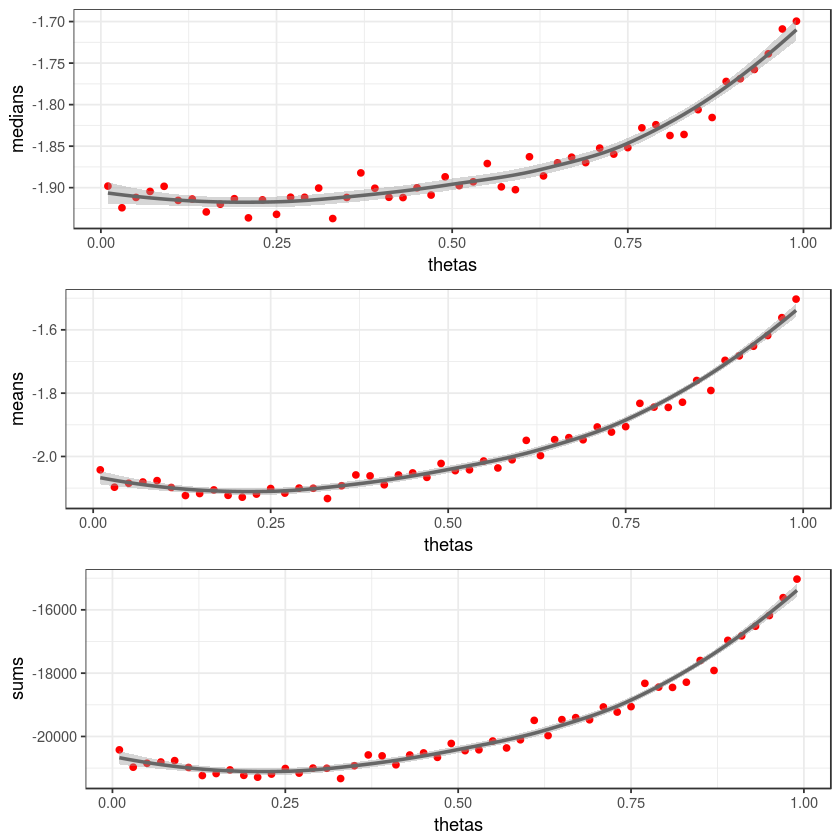

In [150]:
g_medians = ggplot(data=df, aes(x=thetas, y=medians)) +
  geom_point(color="red")+  geom_smooth(color="grey40")+theme_bw()

g_means = ggplot(data=df, aes(x=thetas, y=means)) +
  geom_point(color="red")+  geom_smooth(color="grey40")+theme_bw()

g_sums = ggplot(data=df, aes(x=thetas, y=sums)) +
  geom_point(color="red")+  geom_smooth(color="grey40")+theme_bw()

multiplot(g_medians, g_means, g_sums, cols=1)

In [126]:
RVM_0

R-vine copula with the following pair-copulas:
Tree 1:
4,5  Gaussian (par = 0.3, tau = 0.19) 
1,2  Gaussian (par = 0.9, tau = 0.71) 
1,3  Gaussian (par = 0.5, tau = 0.33) 
1,4  Clayton (par = 4.8, tau = 0.71) 

Tree 2:
1,5;4  Gumbel (par = 1.5, tau = 0.33) 
4,2;1  Gumbel (par = 1.6, tau = 0.38) 
4,3;1  Gumbel (par = 1.9, tau = 0.47) 

Tree 3:
3,5;1,4  Clayton (par = 0.9, tau = 0.31) 
3,2;4,1  Clayton (par = 1.1, tau = 0.35) 

Tree 4:
2,5;3,1,4  Gaussian (par = 0.2, tau = 0.13) 

In [129]:
par_new[5, 1] <- thetas[means == min(means)]
RVM_new <- VineCopula::RVineMatrix(Matrix = Matrix, family = family, par = par_new, par2 = par2)
RVM_new

R-vine copula with the following pair-copulas:
Tree 1:
4,5  Gaussian (par = 0.51, tau = 0.34) 
1,2  Gaussian (par = 0.9, tau = 0.71) 
1,3  Gaussian (par = 0.5, tau = 0.33) 
1,4  Clayton (par = 4.8, tau = 0.71) 

Tree 2:
1,5;4  Gumbel (par = 1.5, tau = 0.33) 
4,2;1  Gumbel (par = 1.6, tau = 0.38) 
4,3;1  Gumbel (par = 1.9, tau = 0.47) 

Tree 3:
3,5;1,4  Clayton (par = 0.9, tau = 0.31) 
3,2;4,1  Clayton (par = 1.1, tau = 0.35) 

Tree 4:
2,5;3,1,4  Gaussian (par = 0.2, tau = 0.13) 